# Nearest neighbor and QDA on the Digits dataset

Import all packages that we need.

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

a) Create the digits data set

In [32]:
digits = datasets.load_digits()

b) Visualize the first four images of the data set

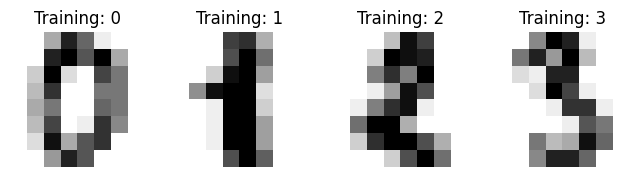

In [47]:
figure = plt.figure(figsize=(8,4))

images_and_labels = list(zip(digits.images, digits.target))

i = 1
for (image, label) in images_and_labels[:4]:
    ax = plt.subplot(1,4,i)
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %i' % label)
    i += 1

c) Flatten the images to turn the data into a (samples, feature) matrix

In [48]:
n_samples = len(digits.images)
data= digits.images.reshape((n_samples, -1))

d) Define the classifier

In [59]:
# classifier = KNeighborsClassifier(3) # 3-Neighbors in KNN-classifier
classifier = QuadraticDiscriminantAnalysis()

e) Split the data set into training and test set

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

f) Train the classifier on the training set

In [61]:
classifier.fit(X_train, y_train)

c:\Users\DrMUAPOR\Documents\Uni\ss25\Machine Learning and Data Analytics\Code\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\DrMUAPOR\Documents\Uni\ss25\Machine Learning and Data Analytics\Code\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\DrMUAPOR\Documents\Uni\ss25\Machine Learning and Data Analytics\Code\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\DrMUAPOR\Documents\Uni\ss25\Machine Learning and Data Analytics\Cod

QuadraticDiscriminantAnalysis()

g) Predict the values of the digits in the images of the test set

In [62]:
predicted = classifier.predict(X_test)

h) Plot the results for the first four images

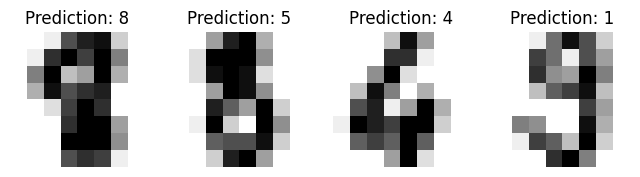

In [63]:
figure = plt.figure(figsize=(8,4))

i = 1
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

for (image, prediction) in images_and_predictions[:4]:
    ax = plt.subplot(1,4,i)
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title('Prediction: %i' % prediction)
    i += 1

i) Plot the classification report

In [64]:
print("Classification report for classifier %s: \n %s \n" % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier QuadraticDiscriminantAnalysis(): 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.68      0.92      0.79        91
           2       0.99      0.87      0.93        86
           3       0.71      0.78      0.74        91
           4       1.00      0.68      0.81        92
           5       0.69      0.59      0.64        91
           6       0.96      1.00      0.98        91
           7       0.71      0.81      0.75        89
           8       0.56      0.92      0.70        88
           9       0.88      0.30      0.45        92

    accuracy                           0.78       899
   macro avg       0.82      0.78      0.78       899
weighted avg       0.81      0.78      0.77       899
 



j) Print the confusion matrix

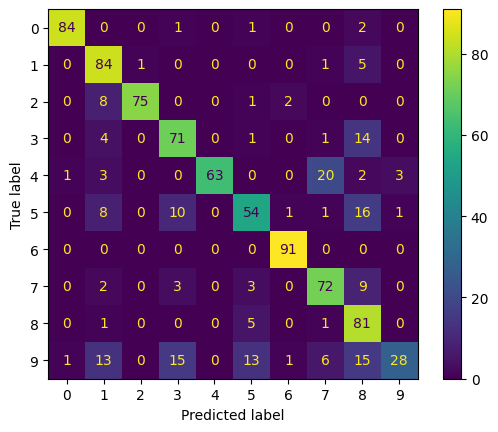

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)